In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import re
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None

### Import & Housekeeping

In [2]:
years = [2008,2017]

movie_df = pd.read_csv('../04_Data/{}_{}_merged_featurized.csv'.format(years[0],years[1]), index_col=0)

In [3]:
movie_df.head(3)

,index,3d,genre,imax,intl_box,mpaa,open,prod_budget,rundays,runtime,series,theaters,title,usa_box,usa_open,action,comedy,drama,horror,romance,animation,scifi/fantasy,genre_counts,other,year,G,NC-17,PG,PG-13,R,Unrated
0,0,0.00,Action / Adventure,1.00,1004558444.00,PG-13,2008-07-18,185000000.00,231,150.00,1.00,4366.00,The Dark Knight,533345358.00,158411483.00,1,0,0,0,0,0,0,1,0,2008,0,0,0,1,0,0
1,1,0.00,Action / Adventure,0.00,585174222.00,PG-13,2008-05-02,186000000.00,NaN,126.00,1.00,4154.00,Iron Man,318412101.00,98618668.00,1,0,0,0,0,0,0,1,0,2008,0,0,0,1,0,0
2,2,0.00,Period Adventure,0.00,786636033.00,PG-13,2008-05-22,185000000.00,Opening,120.00,1.00,4264.00,Indiana Jones and the Kingdom of the Crystal S...,317101119.00,100137835.00,1,0,0,0,0,0,0,1,0,2008,0,0,0,1,0,0


In [4]:
#Set groups of column names to make subsequent plots modular
target = ["usa_box"]
info = ["prod_budget", 'series', 'imax', '3d', "runtime", "year","genre_counts"]
theater = ["title", "theaters"]
mpaa = ["G", "PG", "PG-13", "R"]
genre = ["action", "comedy", "drama", "horror", "scifi/fantasy", "romance", "animation", "other"]

columns = info + mpaa + genre + theater + target  #this is all the columns

In [5]:
#isolate the columns with features and target
movie_df = movie_df[columns]

### Exploratory

In [6]:
movie_df.describe()

,prod_budget,series,imax,3d,runtime,year,genre_counts,G,PG,PG-13,R,action,comedy,drama,horror,scifi/fantasy,romance,animation,other,theaters,usa_box
count,1551.00,2000.00,2000.00,2000.00,1980.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,1998.00,2000.00
mean,50913077.79,0.18,0.10,0.14,108.80,2012.50,1.07,0.03,0.15,0.40,0.37,0.27,0.28,0.26,0.07,0.08,0.04,0.07,0.12,2099.55,52982466.20
std,56217028.31,0.39,0.30,0.35,19.07,2.87,0.55,0.16,0.36,0.49,0.48,0.44,0.45,0.44,0.26,0.27,0.21,0.25,0.32,1332.44,80132432.88
min,100000.00,0.00,0.00,0.00,39.00,2008.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,883887.00
25%,15000000.00,0.00,0.00,0.00,96.00,2010.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,665.25,5871235.00
50%,30000000.00,0.00,0.00,0.00,106.00,2012.50,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2481.00,25468283.50
75%,65000000.00,0.00,0.00,0.00,119.00,2015.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,3166.75,64089023.25
max,425000000.00,1.00,1.00,1.00,250.00,2017.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4535.00,936662225.00


In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 22 columns):
prod_budget      1551 non-null float64
series           2000 non-null float64
imax             2000 non-null float64
3d               2000 non-null float64
runtime          1980 non-null float64
year             2000 non-null int64
genre_counts     2000 non-null int64
G                2000 non-null int64
PG               2000 non-null int64
PG-13            2000 non-null int64
R                2000 non-null int64
action           2000 non-null int64
comedy           2000 non-null int64
drama            2000 non-null int64
horror           2000 non-null int64
scifi/fantasy    2000 non-null int64
romance          2000 non-null int64
animation        2000 non-null int64
other            2000 non-null int64
title            2000 non-null object
theaters         1998 non-null float64
usa_box          2000 non-null float64
dtypes: float64(7), int64(14), object(1)
memory usage: 359.4+ KB

In [8]:
movie_df.head(3)

,prod_budget,series,imax,3d,runtime,year,genre_counts,G,PG,PG-13,R,action,comedy,drama,horror,scifi/fantasy,romance,animation,other,title,theaters,usa_box
0,185000000.00,1.00,1.00,0.00,150.00,2008,1,0,0,1,0,1,0,0,0,0,0,0,0,The Dark Knight,4366.00,533345358.00
1,186000000.00,1.00,0.00,0.00,126.00,2008,1,0,0,1,0,1,0,0,0,0,0,0,0,Iron Man,4154.00,318412101.00
2,185000000.00,1.00,0.00,0.00,120.00,2008,1,0,0,1,0,1,0,0,0,0,0,0,0,Indiana Jones and the Kingdom of the Crystal S...,4264.00,317101119.00


In [9]:
#this removes from the set any movie less than 600 Theater Locations (aka Limited Release)
movie_df = movie_df[movie_df["theaters"]>=600] 

In [10]:
movie_df.shape   #1520 Movies from 2008-2017 with more than 600 Theater Locations

(1520, 22)

In [11]:
movie_df.drop(["theaters"],axis=1,inplace=True)

In [12]:
#this removes from the set any movie with no production budget
movie_df = movie_df.dropna(how='any').reset_index()

In [13]:
movie_df.shape   #1369 Movies that contain a budget on The-Numbers.com

(1369, 22)

In [14]:
movie_df.info()   #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 22 columns):
index            1369 non-null int64
prod_budget      1369 non-null float64
series           1369 non-null float64
imax             1369 non-null float64
3d               1369 non-null float64
runtime          1369 non-null float64
year             1369 non-null int64
genre_counts     1369 non-null int64
G                1369 non-null int64
PG               1369 non-null int64
PG-13            1369 non-null int64
R                1369 non-null int64
action           1369 non-null int64
comedy           1369 non-null int64
drama            1369 non-null int64
horror           1369 non-null int64
scifi/fantasy    1369 non-null int64
romance          1369 non-null int64
animation        1369 non-null int64
other            1369 non-null int64
title            1369 non-null object
usa_box          1369 non-null float64
dtypes: float64(6), int64(15), object(1)
memory usage: 235.4+ KB


### Distribution Plots

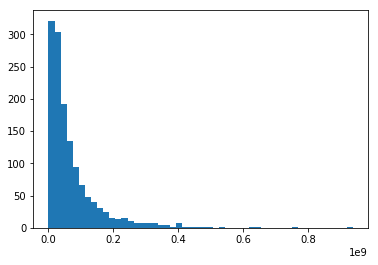

In [35]:
#Box Office
plt.hist(movie_df['usa_box'],bins=50)
plt.savefig("residuals.pdf");

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


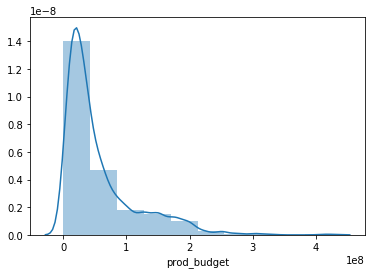

In [28]:
#Production Budget
sns.distplot(movie_df['prod_budget'],bins=10);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


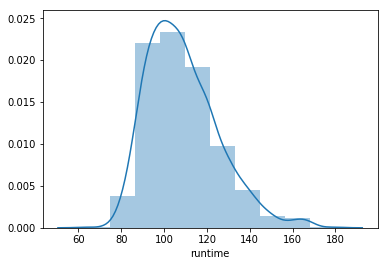

In [29]:
#Runtime
sns.distplot(movie_df["runtime"],bins=10);

### Pair Plots! 

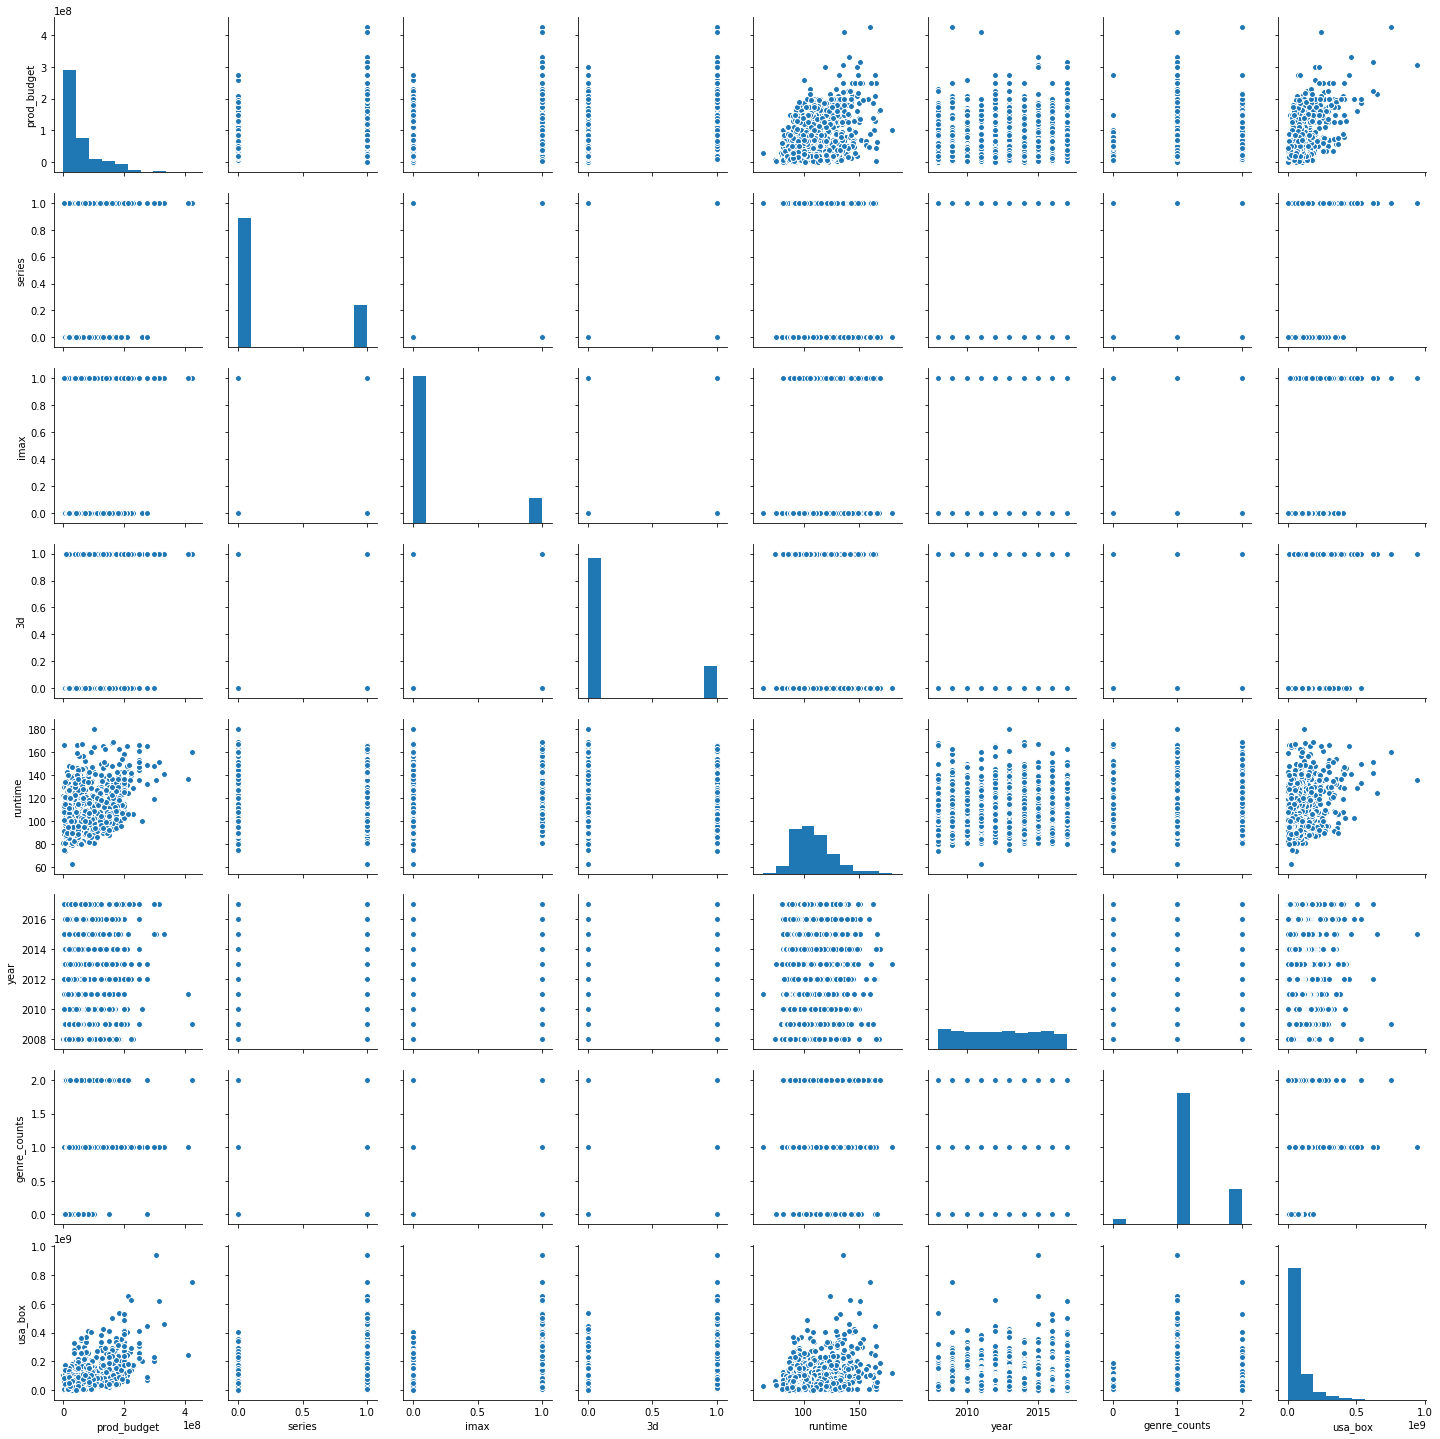

In [99]:
sns.pairplot(movie_df[info + target])

In [23]:
movie_df[info + target].corr()

,prod_budget,series,imax,3d,runtime,year,genre_counts,usa_box
prod_budget,1.00,0.38,0.59,0.54,0.40,0.05,0.01,0.69
series,0.38,1.00,0.34,0.30,0.08,0.13,-0.05,0.50
imax,0.59,0.34,1.00,0.43,0.28,0.17,0.02,0.49
3d,0.54,0.30,0.43,1.00,-0.01,0.17,-0.06,0.39
runtime,0.40,0.08,0.28,-0.01,1.00,0.13,0.01,0.33
year,0.05,0.13,0.17,0.17,0.13,1.00,-0.02,0.07
genre_counts,0.01,-0.05,0.02,-0.06,0.01,-0.02,1.00,-0.03
usa_box,0.69,0.50,0.49,0.39,0.33,0.07,-0.03,1.00


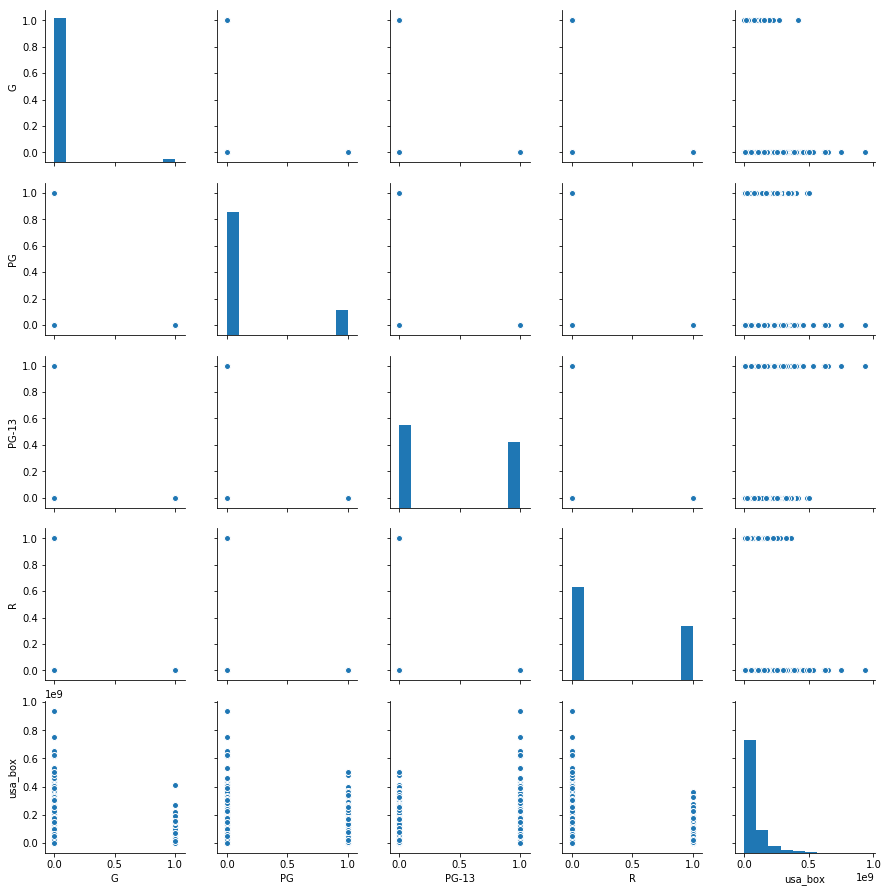

In [18]:
sns.pairplot(movie_df[mpaa + target])

In [24]:
movie_df[mpaa + target].corr()

,G,PG,PG-13,R,usa_box
G,1.00,-0.07,-0.13,-0.11,0.04
PG,-0.07,1.00,-0.40,-0.34,0.11
PG-13,-0.13,-0.40,1.00,-0.68,0.12
R,-0.11,-0.34,-0.68,1.00,-0.22
usa_box,0.04,0.11,0.12,-0.22,1.00


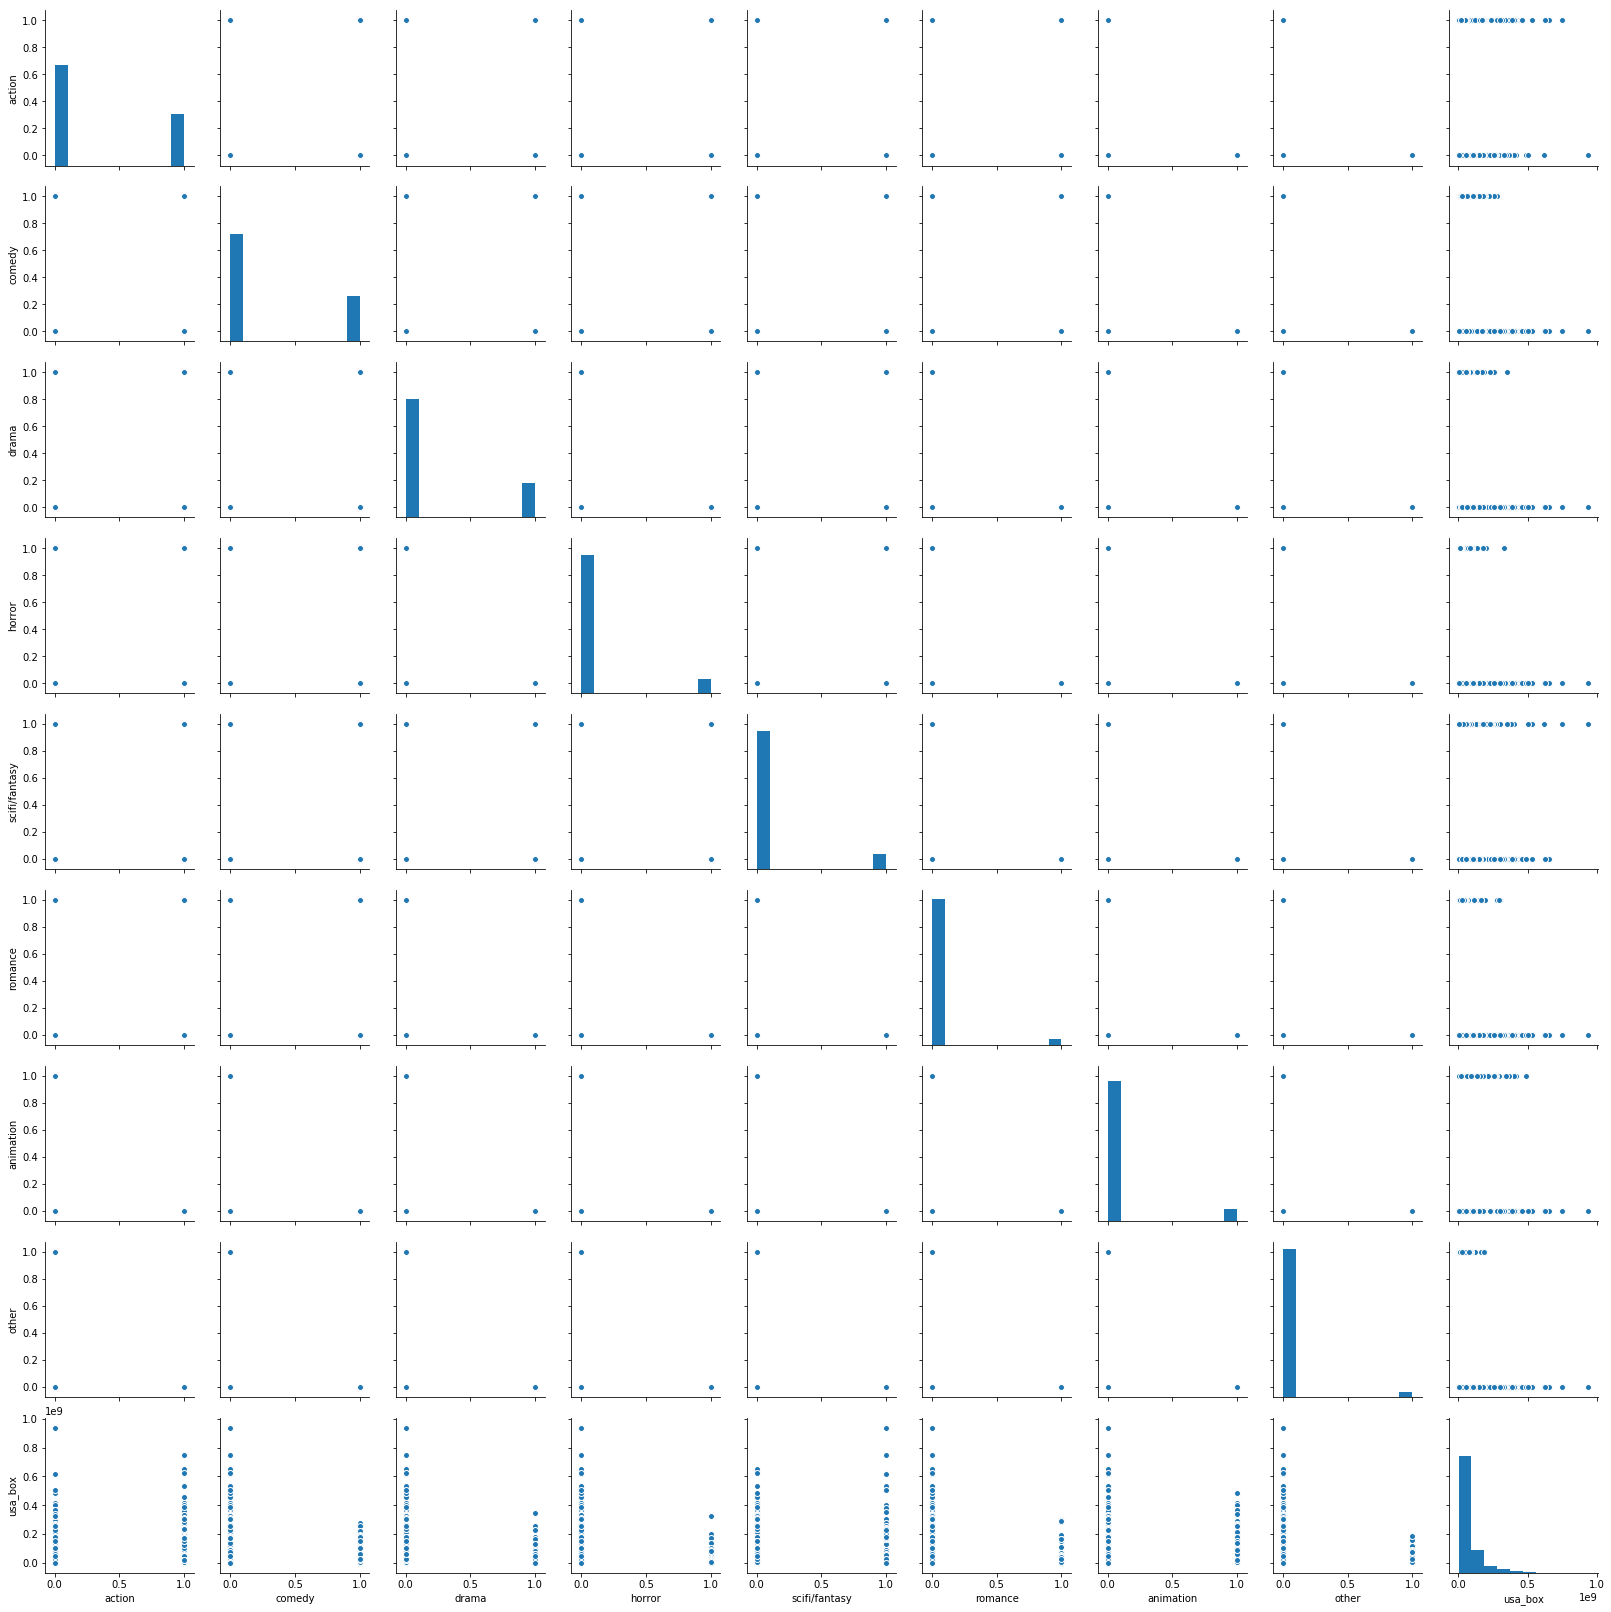

In [148]:
sns.pairplot(movie_df[genre + target])

In [25]:
movie_df[genre + target].corr()

,action,comedy,drama,horror,scifi/fantasy,romance,animation,other,usa_box
action,1.00,-0.33,-0.23,-0.11,0.07,-0.13,-0.21,-0.13,0.13
comedy,-0.33,1.00,-0.17,-0.15,-0.16,0.14,-0.19,-0.12,-0.15
drama,-0.23,-0.17,1.00,-0.17,-0.13,-0.11,-0.16,-0.10,-0.18
horror,-0.11,-0.15,-0.17,1.00,-0.06,-0.07,-0.10,-0.06,-0.10
scifi/fantasy,0.07,-0.16,-0.13,-0.06,1.00,-0.07,-0.10,-0.06,0.16
romance,-0.13,0.14,-0.11,-0.07,-0.07,1.00,-0.06,-0.04,-0.00
animation,-0.21,-0.19,-0.16,-0.10,-0.10,-0.06,1.00,-0.05,0.19
other,-0.13,-0.12,-0.10,-0.06,-0.06,-0.04,-0.05,1.00,-0.05
usa_box,0.13,-0.15,-0.18,-0.10,0.16,-0.00,0.19,-0.05,1.00


## Box Plots

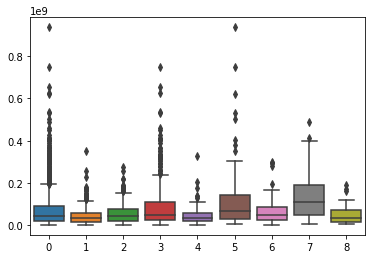

In [30]:
all_genre = movie_df["usa_box"].to_frame()
drama = movie_df["usa_box"][movie_df["drama"] == 1].to_frame()
comedy = movie_df["usa_box"][movie_df["comedy"] == 1].to_frame()
action = movie_df["usa_box"][movie_df["action"] == 1].to_frame()
horror = movie_df["usa_box"][movie_df["horror"] == 1].to_frame()
scifi = movie_df["usa_box"][movie_df["scifi/fantasy"] == 1].to_frame()
romance = movie_df["usa_box"][movie_df["romance"] == 1].to_frame()
animation = movie_df["usa_box"][movie_df["animation"] == 1].to_frame()
other = movie_df["usa_box"][movie_df["other"] == 1].to_frame()
sns.boxplot(data=[all_genre, drama,comedy,action,horror,scifi,romance,animation,other]);

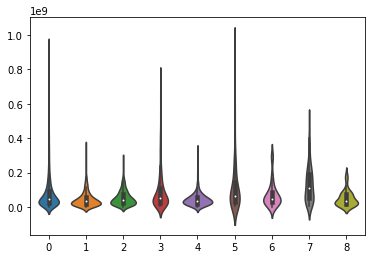

In [31]:
sns.violinplot(data=[all_genre, drama,comedy,action,horror,scifi,romance,animation,other]);

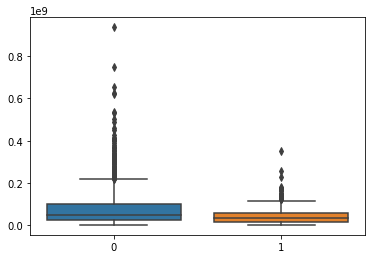

In [32]:
#DRAMA
drama = movie_df["usa_box"][movie_df["drama"] == 1].to_frame()
not_drama = movie_df["usa_box"][movie_df["drama"] == 0].to_frame()
sns.boxplot(data=[not_drama, drama]);

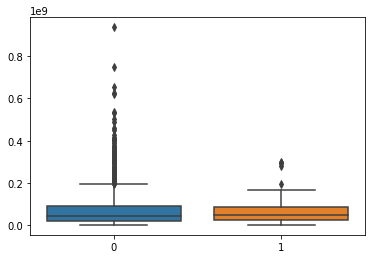

In [33]:
#ROMANCE
romance = movie_df["usa_box"][movie_df["romance"] == 1].to_frame()
not_romance = movie_df["usa_box"][movie_df["romance"] == 0].to_frame()
sns.boxplot(data=[not_romance, romance]);

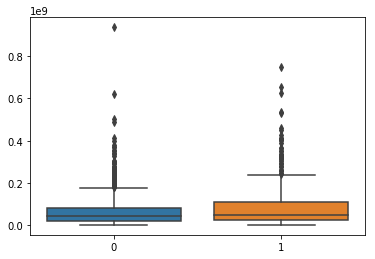

In [34]:
#ACTION
action = movie_df["usa_box"][movie_df["action"] == 1].to_frame()
not_action = movie_df["usa_box"][movie_df["action"] == 0].to_frame()
sns.boxplot(data=[not_action, action]);

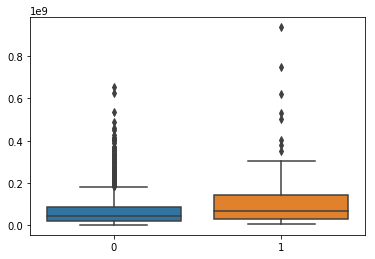

In [35]:
#SCIFI/FANTASY
scifi = movie_df["usa_box"][movie_df["scifi/fantasy"] == 1].to_frame()
not_scifi = movie_df["usa_box"][movie_df["scifi/fantasy"] == 0].to_frame()
sns.boxplot(data=[not_scifi, scifi]);

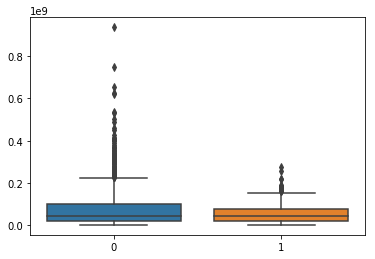

In [36]:
#COMEDY
comedy = movie_df["usa_box"][movie_df["comedy"] == 1].to_frame()
not_comedy = movie_df["usa_box"][movie_df["comedy"] == 0].to_frame()
sns.boxplot(data=[not_comedy, comedy]);

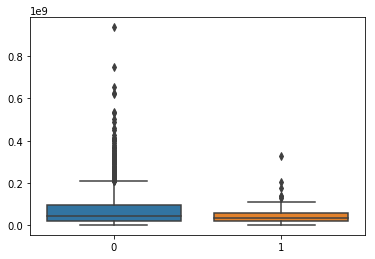

In [37]:
#HORROR
horror = movie_df["usa_box"][movie_df["horror"] == 1].to_frame()
not_horror = movie_df["usa_box"][movie_df["horror"] == 0].to_frame()
sns.boxplot(data=[not_horror, horror]);

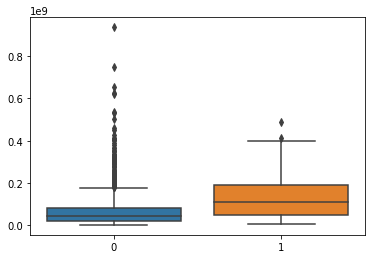

In [38]:
#ANIMATION
comedy = movie_df["usa_box"][movie_df["animation"] == 1].to_frame()
not_comedy = movie_df["usa_box"][movie_df["animation"] == 0].to_frame()
sns.boxplot(data=[not_comedy, comedy]);

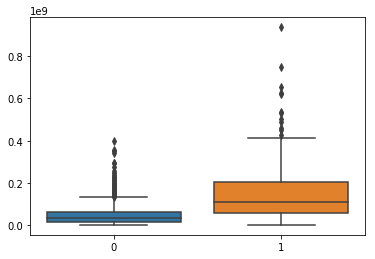

In [39]:
#SERIES
series = movie_df["usa_box"][movie_df["series"] == 1].to_frame()
not_series = movie_df["usa_box"][movie_df["series"] == 0].to_frame()
sns.boxplot(data=[not_series, series]);

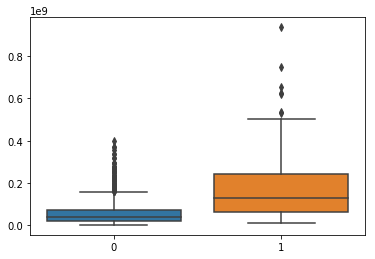

In [40]:
#IMAX
imax = movie_df["usa_box"][movie_df["imax"] == 1].to_frame()
not_imax = movie_df["usa_box"][movie_df["imax"] == 0].to_frame()
sns.boxplot(data=[not_imax, imax]);

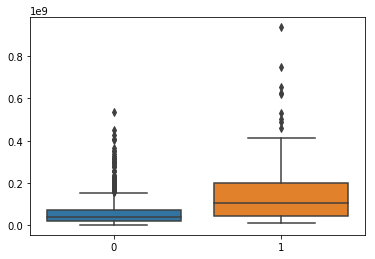

In [41]:
#3D
threed = movie_df["usa_box"][movie_df["3d"] == 1].to_frame()
not_threed = movie_df["usa_box"][movie_df["3d"] == 0].to_frame()
sns.boxplot(data=[not_threed, threed]);

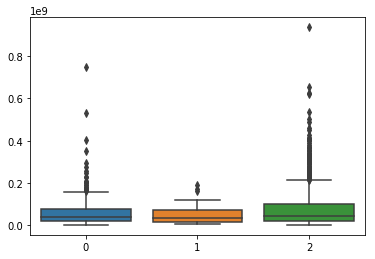

In [42]:
#Genre Numbers
much_variable = movie_df["usa_box"][movie_df["genre_counts"] == 2].to_frame()
variable = movie_df["usa_box"][movie_df["genre_counts"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["genre_counts"] == 0].to_frame()
sns.boxplot(data=[much_variable, not_variable, variable]);

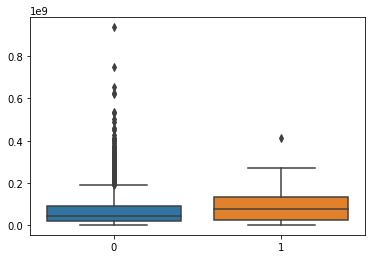

In [43]:
#G-Rating
variable = movie_df["usa_box"][movie_df["G"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["G"] == 0].to_frame()
sns.boxplot(data=[not_variable, variable]);

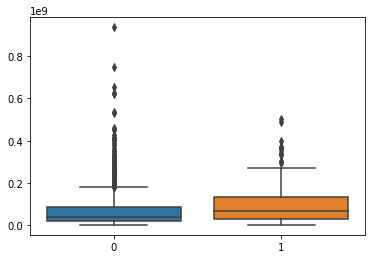

In [44]:
#PG-Rating
variable = movie_df["usa_box"][movie_df["PG"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["PG"] == 0].to_frame()
sns.boxplot(data=[not_variable, variable]);

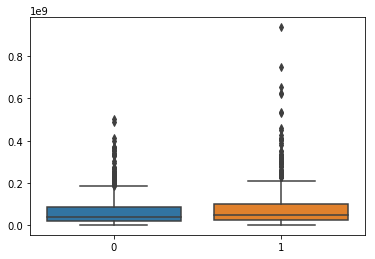

In [45]:
#PG13-Rating
variable = movie_df["usa_box"][movie_df["PG-13"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["PG-13"] == 0].to_frame()
sns.boxplot(data=[not_variable, variable]);

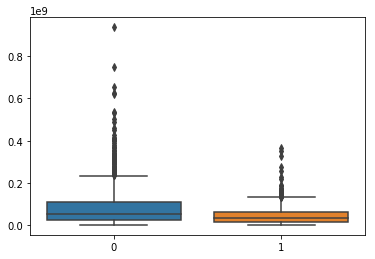

In [46]:
#R-Rating
variable = movie_df["usa_box"][movie_df["R"] == 1].to_frame()
not_variable = movie_df["usa_box"][movie_df["R"] == 0].to_frame()
sns.boxplot(data=[not_variable, variable]);

### Baseline Model & OLS Regression Summary Stats

In [57]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [58]:
#baseline model & OLS regression summary stats
X=movie_df[info + mpaa + genre]

y=movie_df[target]


model = sm.OLS(y,sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                usa_box   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     104.8
Date:                Wed, 10 Oct 2018   Prob (F-statistic):          3.43e-232
Time:                        14:30:02   Log-Likelihood:                -26424.
No. Observations:                1369   AIC:                         5.288e+04
Df Residuals:                    1351   BIC:                         5.298e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.02e+09   9.41e+08      1.084      0.279   -8.26e+08    2.87e+09
prod_budget       0.7763      0.046     16.709      0.000       0.685       0.867
series         5.624e+07   4.22e+06     13.325      0.000     4.8e+07    6.45e+07
imax           2.552e+07   5.95e+06      4.292      0.000    1.39e+07    3.72e+07
3d            -6.619e+06   5.77e+06     -1.147      0.252   -1.79e+07     4.7e+06
runtime        6.708e+05    1.3e+05      5.165      0.000    4.16e+05    9.26e+05
year          -6.594e+05   5.85e+05     -1.126      0.260   -1.81e+06    4.89e+05
genre_counts   -3.84e+05   3.81e+06     -0.101      0.920   -7.85e+06    7.09e+06
G              2.555e+08   2.34e+08      1.091      0.276   -2.04e+08    7.15e+08
PG             2.543e+08   2.35e+08      1.080      0.280   -2.08e+08    7.16e+08
PG-13          2.553e+08   2.36e+08      1.083      0.279   -2.07e+08    7.18e+08
R              2.547e+08   2.36e+08      1.080      0.280   -2.08e+08    7.17e+08
action        -1.563e+07   3.42e+06     -4.574      0.000   -2.23e+07   -8.93e+06
comedy         1.221e+05   3.63e+06      0.034      0.973      -7e+06    7.25e+06
drama         -5.747e+06   4.03e+06     -1.424      0.155   -1.37e+07    2.17e+06
horror        -7.183e+06   5.35e+06     -1.343      0.180   -1.77e+07    3.31e+06
scifi/fantasy -1.078e+07   5.24e+06     -2.056      0.040   -2.11e+07   -4.96e+05
romance        1.416e+07   7.31e+06      1.936      0.053   -1.89e+05    2.85e+07
animation      2.467e+07    7.4e+06      3.335      0.001    1.02e+07    3.92e+07
other         -1.654e+07   1.06e+07     -1.561      0.119   -3.73e+07    4.25e+06
==============================================================================
Omnibus:                      754.348   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11835.663
Skew:                           2.209   Prob(JB):                         0.00
Kurtosis:                      16.710   Cond. No.                     7.33e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0,0.5,'Residual')

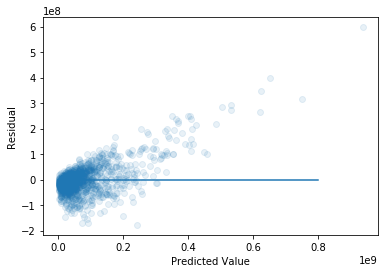

In [99]:
y_pred = results.predict(sm.add_constant(X))

plt.scatter(y["usa_box"], y["usa_box"] - y_pred, alpha=.1)
plt.plot(np.linspace(0,800000000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

In [ ]:
diagnostic_plot(x, y)